In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as na
import matplotlib.patches as patches 
import scipy.integrate as si
import sympy as sy  
import sympy.plotting as splot
import IPython.display as disp  
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
%matplotlib inline
sy.init_printing()

In [2]:
from Beam_module import *

# Введенные значения

In [18]:
L_m = int(input('Введите длину: '))  # длина
t_mm = int(input('Введите толщину: '))  # толщина
P_N = 100e3  # нагрузка
wa_mm = int(input('Введите ширину в точке А: '))  # ширина в точке A
wb_mm = int(input('Введите ширину в точке B: '))  # ширина в точке B
E_Pa = 200e9  # константа упругости

Введите длину:  4000
Введите толщину:  15000
Введите ширину в точке А:  7634
Введите ширину в точке B:  3979


In [19]:
# Разделяем диапазон x от 0 ~ L на 100 интервалов.
x_m_array = np.linspace(0, L_m, 100 + 1)

In [20]:
# Ширина материала изменяется от ширины точки А до ширины точки B, как изменяется x от 0 до L.
h_mm = (wb_mm - wa_mm) * x_m_array / L_m + wa_mm

In [21]:
# Сначала укажем значения для x и y.
plt.plot(x_m_array, h_mm, label='h(mm)')

# Установим минимальное значение y.
plt.ylim(ymin=0)

# Задаем имена для осей x, y.
plt.xlabel('x(m)')
plt.ylabel('h(mm)')

# Добавляем сетку на график.
plt.grid(True)

# Добавляем область, описывающую элементы графика.
plt.legend(loc=0)

# Рисуем график.
plt.show()

### Площадь участка

In [22]:
X = 1e-3
A_m2 = t_mm * h_mm * (X**2)

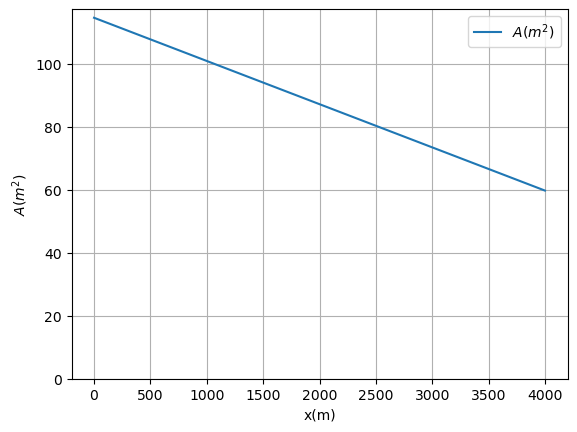

In [23]:
# Построим график площади сечения по x.
plt.plot(x_m_array, A_m2, label='$A(m^2)$')
plt.ylim((0, plt.ylim()[-1]))  # Устанавливаем минимальное значение для оси y на 0
plt.xlabel('x(m)')
plt.ylabel('$A(m^2)$')
plt.grid(True)
plt.legend(loc=0)
plt.show()

### График давления (нагрузки)

In [24]:
sigma_Pa = P_N / A_m2

In [25]:
plt.plot(x_m_array, sigma_Pa * 1e-6, label='$\sigma(MPa)$')
plt.ylim((0, plt.ylim()[-1]))  # Устанавливаем минимальное значение для оси y на 0
plt.xlabel('x(m)')
plt.ylabel('$\sigma(MPa)$')
plt.grid(True)
plt.legend(loc=0)
plt.show()

### График деформирования

In [26]:
# Заметно, что напряжение и деформация обратно пропорциональны x.
epsilon = sigma_Pa / E_Pa
plt.fill_between(x_m_array, epsilon)
plt.xlabel('x(m)')
plt.ylabel('$\epsilon$')
plt.grid(True)
plt.show()

In [27]:
# Проинтегрируем деформацию, используя формулу интегрирования по трапеции.
delta_m = np.trapz(epsilon, x_m_array)

### Проверка корректности работы кода

In [28]:
import IPython.display as disp
disp.Math(f"\delta = {delta_m:f}(m) = {delta_m*1000:f}(mm)")

<IPython.core.display.Math object>

In [29]:
assert(1e-5 > abs(delta_m*1000-3.433256))

AssertionError: 

# Бетонная колонна (расчет)

In [30]:
A_bar_mm2 = int(input('Площадь сечения одного бруса:')) # Площадь сечения одного бруса
n_bar = int(input('Кол-во брусьев:')) # Количество брусьев
P_N = 1000e3 # Сжимающая нагрузка
# Модули Юнга стали и бетона
E_steel_Pa = 200e1
E_concrete_Pa = 14e9
w_mm = int(input('Введите значение длины одной стороны квадратной бетонной колонны:')) # Длина одной стороны квадратной бетонной колонны

Площадь сечения одного бруса: 8654
Кол-во брусьев: 678
Введите значение длины одной стороны квадратной бетонной колонны: 9000


In [31]:
# Мы также можем определить сжимающую нагрузку с помощью напряжений.
# Предположим, что смещения стальных стержней и бетонной колонны одинаковы.
X = 1e-3
A_bar_m2 = A_bar_mm2 * X**2
w_m = w_mm * X

disp.Math(f'X = {X}(m)')

<IPython.core.display.Math object>

In [32]:
disp.Math(f'A_{{bar}} = {A_bar_m2}(m^2)')

<IPython.core.display.Math object>

In [33]:
# Определяем матрицу коэффициентов.
A_mat = np.matrix([[n_bar * A_bar_m2, w_m**2 - n_bar * A_bar_m2],
                   [1./E_steel_Pa, -1./E_concrete_Pa]])
A_mat

matrix([[ 5.86741200e+00,  7.51325880e+01],
        [ 5.00000000e-04, -7.14285714e-11]])

In [34]:
# Определяем постоянный вектор.
b_vec = np.matrix([[P_N],
                  [0.0]])
b_vec

matrix([[1000000.],
        [      0.]])

In [35]:
# Решаем матричное уравнение.
sigma_Pa_mat = na.solve(A_mat, b_vec)
sigma_Pa_mat

matrix([[1.90140052e-03],
        [1.33098036e+04]])

In [36]:
disp.Math(f'\sigma_{{steel}} = {sigma_Pa_mat[0,0]:g}(Pa)' )

<IPython.core.display.Math object>

In [37]:
disp.Math(f'\sigma_{{concrete}} = {sigma_Pa_mat[1,0]:g}(Pa)' )

<IPython.core.display.Math object>

In [38]:
sigma_MPa_mat = sigma_Pa_mat * 1e-6
sigma_MPa_mat

matrix([[1.90140052e-09],
        [1.33098036e-02]])

In [ ]:
# Нагрузка на один стальной брусок будет равна произведению напряжения в стальном бруске и площади одного стального бруска.
P_steel_1_kN = sigma_Pa_mat[0] * A_bar_m2 * 1e-3
P_steel_1_kN

In [ ]:
# Нагрузка на четыре стальных бруса будет в четыре раза больше.
P_steel_4_kN = P_steel_1_kN * n_bar
P_steel_4_kN

In [ ]:
# Нагрузка на бетон будет следующей.
P_concrete_kN = sigma_Pa_mat[1] * (w_m**2 - n_bar * A_bar_m2) * 1e-3
P_concrete_kN

In [ ]:
# Для проверки просуммируем обе нагрузки.
float(P_steel_4_kN + P_concrete_kN)

In [ ]:
# Следующие части проверяют правильность работы программы.
zero_mat = A_mat * sigma_Pa_mat - b_vec
assert(1e-7 > abs(zero_mat[0, 0]))
assert(1e-7 > abs(zero_mat[1, 0]))

In [ ]:
assert(1e-7 > (abs(float(P_steel_4_kN + P_concrete_kN) - P_N * 1e-3)))

# Второй момент инерции (момент инерции площади)

In [ ]:
import os
import sys

In [ ]:
sys.path.append(os.path.abspath(os.path.join(os.pardir, 'utils')))

In [ ]:
import draw_diagrams

In [ ]:
draw_diagrams.rect_section()

In [ ]:
b, h, y = sy.symbols('b, h, y', real=True)
I = sy.integrate(b * y**2, (y, -h/2, h/2))

In [ ]:
I

# О координате c и теореме о параллельных осях

In [ ]:
import draw_diagrams
draw_diagrams.rect_section_c()

In [ ]:
b, h, c, y = sy.symbols('b, h, c, y', real=True)
I_C = sy.integrate(b * (y - c)**2, (y, -h/2, h/2))

In [ ]:
I_C

In [ ]:
assert True

# Напряжение при изгибе

In [ ]:
h_m = 200e-3

c_m = h_m * 0.5

y_m_array = np.linspace(-c_m, c_m, 6)
zeros_array = np.zeros_like(y_m_array)

sigma_max_Pa = 20000000.0

slope = - sigma_max_Pa / c_m
sigma_Pa_array = slope * y_m_array

plt.clf()
plt.grid(True)
plt.plot(zeros_array, y_m_array)
plt.plot(sigma_Pa_array, y_m_array)

for sigma_Pa, y_m in zip(sigma_Pa_array, y_m_array):
    plt.arrow(0.0, y_m,
             sigma_Pa*0.9, 0.0, head_width=1e-2, head_length=abs(sigma_Pa*.1))

plt.xlabel('$\\sigma$[Pa]')
plt.ylabel('$y$[m]')
plt.show()
print(sigma_Pa_array)
#  Видно, что распределенные по оси напряжения создают момент против часовой стрелки, а площадь растягивающих напряжений равна площади сжимающих напряжений.

# Графическое представление балки и внешних сил, влияющих на него

In [ ]:
plt.figure(figsize=(8,4))
rep_axis(scale=0.5, lineformat='y-')

rep_fix(0,0, scale=1, label='A', shw_label='left')
rep_none(10,0, scale=1, label='B', shw_label=True)
rep_element(0,10,-0.25, 0.25)
rep_leng(0,10,-0.25,-0.25, label='L', label_offset=(0,-0.25))
rep_vector(10, 0, 11.5, 0, offset=(0, 0.25), lineformat='b-', label='$P$', arrow_scale=0.15, aligned=True)
rep_vector(0, 0, -1.5, 0, offset=.2, lineformat='r-', label='$R_A$', arrow_scale=0.15)


In [ ]:
plt.figure(figsize=(8,4))
rep_axis(scale=0.5, lineformat='y-')

rep_fix(0,0, scale=1, label='A', shw_label='left')
rep_none(10,0, scale=1, label='B', shw_label=True)
rep_element(0,6,-0.5, 0.5)
rep_element(6,10,-0.25, 0.25)
rep_leng(0,10,-0.25,-0.25, offset=-2, label='L', label_offset=(0,-0.25))
rep_leng(0,6,-0.25,-0.25, label='a', label_offset=(0,-0.25), arrow_scale=0.025)
rep_leng(6,10,-0.25,-0.25, label='b', label_offset=(0,-0.25), arrow_scale=0.038)
rep_vector(11.5, 0, 10, 0, offset=(0, 0.25), lineformat='b-', label='$P_1$', arrow_scale=0.15, aligned=True)
rep_vector(6, 0, 7, 0, offset=(0.2, 0.5), lineformat='b-', label='$P_2$', arrow_scale=0.15, aligned=True)
rep_vector(0, 0, -1.5, 0, offset=.2, lineformat='r-', label='$R_A$', arrow_scale=0.15)

In [ ]:
plt.figure(figsize=(8,3))
rep_axis(scale=0.75, lineformat='y-')

rep_none(10,0, scale=1, label='B', shw_label=True, rotation=180)
rep_fix(0,0, scale=1, label='A', shw_label='right')
rep_element(0,10,-0.25, 0.25, fill=True)
rep_leng(0,10,-0.25,-0.25, label='L', label_offset=(0,-0.25))
rep_vector(10, 1.5, 10, 0.25, offset=(-0.25,0), lineformat='b-', label='$P$', arrow_scale=0.15)
rep_vector(0, -1.5, 0, -0.35, offset=-.20, lineformat='r-', label='$R_A$', arrow_scale=0.15)
rep_pair(0,0,0.5,70,240, lineformat='r-', label='$M_A$', label_offset=-0.3)

In [ ]:
plt.figure(figsize=(3,8))
rep_axis(scale=1.5, lineformat='y-')

rep_fix(0,0, scale=1.5, label='A', shw_label='left', rotation=270)
plt.text(0.2, 8.2, 'B')
rep_element(-0.4,0.4,0.0, 8)
rep_leng(-0.4,-0.4,0,8, label='L', label_offset=(0.25,0), offset=-1.5)
rep_vector(-1.5, 9.5, -0., 8, offset=(0, 0.25), lineformat='b-', label='$P$', arrow_scale=0.15, aligned=True)
rep_vector(1.7, 0, 0.4, 0, offset=(0,-0.2), lineformat='r-', label='$H_{A}$', arrow_scale=0.15)
rep_vector(0, -1.5, 0, 0, offset=(0.5, -0.2), lineformat='r-', label='$R_{A}$', arrow_scale=0.15)
rep_pair(0,0,0.5,120,330, lineformat='r-', label='$M_A$', label_offset=0.3)
rep_pair(0,8,0.75,135,180, lineformat='k-', label='$ \\theta$', label_offset=[-0.2,0.35], arrow_scale=0)
plt.plot([-1,0],[8,8],'k-',linewidth=0.5)

In [ ]:
plt.figure(figsize=(8,4))
rep_axis(scale=0.5, lineformat='y-')

rep_fix(10,0, scale=1.5, label='B', shw_label=True, rotation=180)
rep_none(0,0, scale=1, label='A', shw_label='right')
rep_element(0,10,-0.25, 0.25, fill=True)
rep_leng(0,10,-0.25,-0.25, offset=-2, label='L', label_offset=(0,-0.25))
rep_leng(0,7,-0.25,-0.25, label='a', label_offset=(0,-0.25), arrow_scale=0.025)
rep_leng(7,10,-0.25,-0.25, label='b', label_offset=(0,-0.25), arrow_scale=0.052)
rep_vector(0, -1.5, 0, -0.25, offset=(-0.25,0), lineformat='b-', label='$P_1$', arrow_scale=0.15)
rep_vector(7, 1.5, 7, 0.25, offset=(-0.25,0), lineformat='b-', label='$P_2$', arrow_scale=0.15)
rep_vector(10, -1.5, 10, -0.35, offset=-.20, lineformat='r-', label='$R_B$', arrow_scale=0.15)
rep_pair(10,0,0.5,120,-70, lineformat='r-', label='$M_B$', label_offset=0.3)

In [ ]:
plt.figure(figsize=(8,4))
rep_axis(scale=0.5, lineformat='y-')

rep_pinned(0,-0.20,scale=0.75, label='A', shw_label=True)
rep_roller(10,-0.20,scale=0.75, label='B', shw_label=True)
rep_element(0,10,-0.20, 0.20)
rep_leng(0,10,-0.20,-0.20, label='L', label_offset=(0,-0.20), offset = -2.25)
rep_leng(0,3.5,-0.20,-0.20, label='a', label_offset=(0,-0.2), offset = -1.65, arrow_scale=0.03)
rep_vector(3.5, 1.5, 3.5, 0.20, offset=(-0.3,0), lineformat='b-', label='$P_1$', arrow_scale=0.15)
rep_vector(5, 1.75, 5, 0.20, offset=(-0.3,0), lineformat='b-', label='$P_2$', arrow_scale=0.15)
rep_vector(0, -1.5, 0, -0.25, offset=(.20,-.6), lineformat='r-', label='$R_A$', arrow_scale=0.15)
rep_vector(10, -1.5, 10, -0.25, offset=(.20,-.6), lineformat='r-', label='$R_B$', arrow_scale=0.15)
rep_leng(3.5,5,-0.20,-0.20, label='b', label_offset=(0,-0.2), offset = -1.65, arrow_scale=0.05)
rep_leng(5,10,-0.20,-0.20, label='c', label_offset=(0,-0.2), offset = -1.65, arrow_scale=0.03)

In [ ]:
plt.figure(figsize=(8,4))

rep_axis(scale=0.5, lineformat='y-')
rep_pinned(0,-0.20,scale=0.75, label='A', shw_label=True)
rep_roller(10,-0.20,scale=0.75, label='B', shw_label=True)
rep_element(0,10,-0.20, 0.20)
rep_leng(0,10,-0.20,-0.20, label='L', label_offset=(0,-0.20), offset = -2.25)
rep_leng(0,5,-0.20,-0.20, label='a', label_offset=(0,-0.2), offset = -1.65, arrow_scale=0.03)
rep_vector(6.5, 1.50, 5, 0.0, offset=(-0.2,0.15), lineformat='b-', label='$P$', arrow_scale=0.15)
rep_vector(0, -1.5, 0, -0.25, offset=(.20,-.6), lineformat='r-', label='$R_A$', arrow_scale=0.15)
rep_vector(-1.3, 0, -0, 0, offset=(.0,-.2), lineformat='r-', label='$H_A$', arrow_scale=0.15)
rep_vector(10, -1.5, 10, -0.25, offset=(.20,-.6), lineformat='r-', label='$R_B$', arrow_scale=0.15)
rep_leng(5,10,-0.20,-0.20, label='b', label_offset=(0,-0.2), offset = -1.65, arrow_scale=0.03)
rep_pair(5,0,0.75,0,45, lineformat='k-', label='$ \\theta$', label_offset=(0.35,-0.10), arrow_scale=0)

In [ ]:
plt.figure(figsize=(8,4))

rep_axis(scale=0.5, lineformat='y-')
rep_pinned(0,-0.20,scale=0.75, label='A', shw_label=True)
rep_roller(8,-0.20,scale=0.75, label='B', shw_label=True)
rep_element(0,10,-0.20, 0.20)
rep_leng(0,10,-0.20,-0.20, label='L', label_offset=(0,-0.20), offset = -2.25)
rep_leng(0,8,-0.20,-0.20, label='a', label_offset=(0,-0.2), offset = -1.65, arrow_scale=0.03)
rep_vector(10, 1.5, 10, 0.20, offset=(0.2), lineformat='b-', label='P', arrow_scale=0.15)
rep_vector(0, -1.5, 0, -0.25, offset=(.20,-.4), lineformat='r-', label='$R_A$', arrow_scale=0.15)
rep_vector(8, -1.5, 8, -0.25, offset=(.20,-.4), lineformat='r-', label='$R_B$', arrow_scale=0.15)
rep_leng(8,10,-0.20,-0.20, label='b', label_offset=(0,-0.2), offset = -1.65, arrow_scale=0.1)